# 1Team_data_analysis
***
# 가정폭력 피해자 지원 및 사회적 인식 개선 방안
## 개요
 <[주거특성이 주거만족도와 주거가치관에 미치는 영향에 관한 연구](http://www.reacademy.org/rboard/data/krea2_new/63_19.pdf)>에 따르면 주변 환경, 치안, 범죄 등 치안 및 방범과 관련된 요인이 주거 환경의 전반적인 만족도에 가장 큰 영향을 준다고 한다. 1team은 치안,범죄 중 주거환경과 가장 연관있는 **가정폭력**관련 데이터를 분석하고, 인사이트를 도출하고자 하였다.<br><br>
 전국 가정폭력 융합요소 데이터 분석에서 **가정폭력범죄는 재발율이 높은 특성이 있고**,<br>
가정폭력 검거 및 조치 현황 데이터 분석에서 **가해자에 대한 처벌이 잘 이루어지지 않는 특성을 발견했다**.<br>
 또한 가정폭력을 줄이기 위한 정책 설문 데이터 분석에서 **사회문화의 개선과 지원 정책/서비스 홍보의 필요성이 대두되었지만**,<br>
 현행중인 가정폭력 지원 기관 인지 여부에 대한 데이터 분석에서는 **비대면 매체를 이용한 기관의 인지율은 다른 매체에 비해 저조했다**.

1team은 도출된 인사이트를 근거로 지속적으로 고통받는 가정폭력 피해자들에게 쉘터를 제공해줌과 동시에 사회적 인식을 개선하기 위하여,<br>
**공익 캠페인과 정책을 홍보하고, 피해자들의 고민을 상담할 수 있는 익명 커뮤니티 웹서비스**를 제작하고자 한다.
***

## 데이터 분석
### 1. 범죄, 치안 데이터 분석
<[주거특성이 주거만족도와 주거가치관에 미치는 영향에 관한 연구](http://www.reacademy.org/rboard/data/krea2_new/63_19.pdf)>에 따르면,<br>
주변 환경, 치안, 범죄 등 치안 및 방범과 관련된 요인이 주거 환경의 전반적인 만족도에 가장 큰 영향을 준다고 한다.<br>
이를 근거로 주거 환경에서 발생할 수 있는 범죄유형을 알아보기 위해 경찰청에서 제공한 [신고 빈발지 데이터](https://www.bigdata-policing.kr/product/view?product_id=PRDT_500)를 분석해보겠다.

In [1]:
# 주요 라이브러리
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# jupyter notebook 한글깨짐현상 방지를 위한 코드
import platform
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
data2021= pd.read_csv('./dataset/연간 가정폭력 현황/KPU_26_20211231_C_001.csv', header=None)
data2020= pd.read_csv('./dataset/연간 가정폭력 현황/KPU_26_20201231_C_001.csv', header=None)
data2019= pd.read_csv('./dataset/연간 가정폭력 현황/KPU_26_20191231_C_001.csv', header=None)

In [4]:
# 데이터 확인
# columns:신고년도/시도/시군구/총 신고수/가정폭력신고수/데이트폭력신고수/성폭력신고수/몰래카메라 신고수/살인 신고수/강도 신고수/절도 신고수/폭력 신고수
print('\n============================shape============================\n')
print(data2019.shape)
print('\n============================info============================\n')
print(data2019.info())
print('\n============================head============================\n')
print(data2019.head())


============================shape============================

(250, 12)

============================info============================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       250 non-null    int64 
 1   1       250 non-null    object
 2   2       250 non-null    object
 3   3       250 non-null    int64 
 4   4       250 non-null    int64 
 5   5       250 non-null    int64 
 6   6       250 non-null    int64 
 7   7       250 non-null    int64 
 8   8       250 non-null    int64 
 9   9       250 non-null    int64 
 10  10      250 non-null    int64 
 11  11      250 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 23.6+ KB
None

============================head============================

     0    1    2     3     4    5    6   7   8   9     10    11
0  2019  강원도  강릉시  6885  1174  306  144   1   1   7  1308  3945
1  201

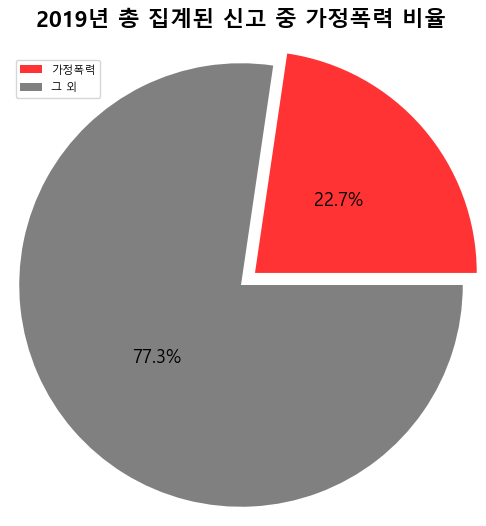

In [5]:
#value_setting
labels='가정폭력','그 외'
values=[data2019[4].sum(), sum(data2020[[5,6,10,11]].sum().values)]
explodes =(0.1,0)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}

#plot
fig=plt.figure(figsize=(6,6))
plt.pie(values,
        explode=explodes,
        radius=1.2,
        autopct='%0.1f%%',
        textprops={'fontsize':13},
        colors=['#FF3333','#808080'],
        pctdistance=0.5)


plt.legend(labels,fontsize=8)
plt.title('2019년 총 집계된 신고 중 가정폭력 비율', fontdict=title_font, pad=20)
plt.show()

19년도 데이터를 분석해보았을 때, 가정폭력 신고건수는 총 집계된 신고건수에서 상당히 많은 비중을 차지하고 있었다.<br><br>
그렇다면, 매년 총 신고집계에서 가정폭력 신고건수가 차지하는 비율이 얼마나 되는지 살펴보자.

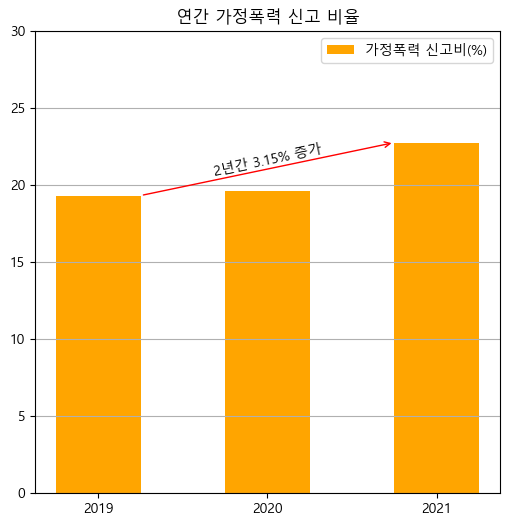

In [6]:
#value_setting
X=['2019','2020','2021']
tot=[100,100,100]
target=[data2019[4].sum()/data2019[3].sum()*100,data2020[4].sum()/data2020[3].sum()*100,data2021[4].sum()/data2021[3].sum()*100]
bar_width = 0.5

#plot
plt.subplots(figsize=(6,6))

plt.rc('axes', axisbelow=True)
plt.grid(True,axis='y')


plt.bar([1,2,3], target,width=bar_width, color='orange', label='가정폭력 신고비(%)')
plt.ylim(0,30)

plt.annotate('',
             xytext=(1+bar_width/2, target[0]),
             xy=(3-bar_width/2, target[2]),
             arrowprops=dict(arrowstyle='->', color='red', lw=1))

plt.annotate('2년간 '+str(np.round(target[2]-target[1],2))+'% 증가',
             xy=(2, target[1]+1),
             rotation=12,
             ha='center',
             va='baseline',
             fontsize=10,
            )

plt.xticks([1,2,3], X)
plt.title('연간 가정폭력 신고 비율')
plt.legend()

# for save image
# plt.savefig('연간 가정폭력 신고 비율 bar.png')

plt.show()

상단 그래프를 통하여 가정폭력 신고비율은 3년간 꾸준히 증가하고있음을 알 수 있다.<br>
#### 따라서 우리는 주거와 가장 밀접하게 관련되어 있고, 신고 추이가 꾸준하게 증가하는 범죄인 가정폭력에 대해 분석해보려 한다.
***

### 2.1 전국 가정폭력 융합요소 데이터
[전국 가정폭력 융합요소](https://www.bigdata-policing.kr/product/view?product_id=PRDT_142) 데이터를 분석하여 가정폭력의 특성을 분석해보겠다.

In [7]:
#os.listdir을 통해 폴더에 존재하는 월별 가정폭력 융합요소 csv파일을 읽어와 순서대로 데이터프레임에 이어붙인다.
files = os.listdir('./dataset/2021')

columns=['신고건수전체','가정폭력재발여부Y','가정폭력재발여부N','가정폭력재발여부기타']
relapse=pd.DataFrame(columns=columns)
for i in files:
    tmp=pd.read_csv('./dataset/2021/'+i,header=None).loc[:,[2,12,13,14]].astype(int)
    date=i.split('09_20')[1][:4]
    relapse.loc[date[:2]+'년 '+date[2:]+'월']=tmp.aggregate(sum).values

In [8]:
relapse.head()

,신고건수전체,가정폭력재발여부Y,가정폭력재발여부N,가정폭력재발여부기타
19년 01월,19660,6311,12749,600
19년 02월,19205,6228,12348,629
19년 03월,20175,6561,13031,583
19년 04월,18819,5934,12274,611
19년 05월,19845,6350,12794,701


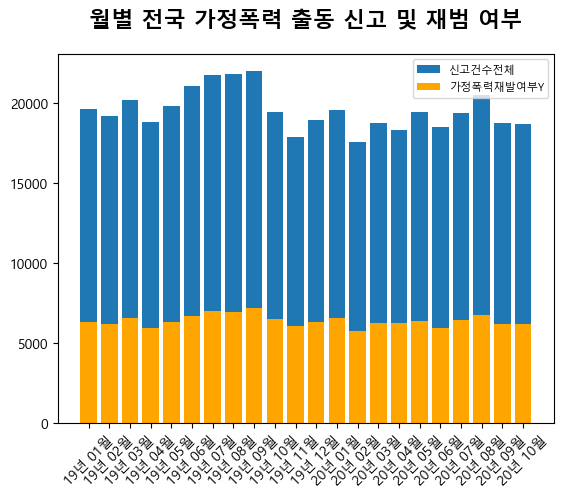

In [9]:
X=relapse.index[:22]
plt.bar(X,relapse.iloc[:22,0])
plt.bar(X,relapse.iloc[:22,1],color='orange')
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title('월별 전국 가정폭력 출동 신고 및 재범 여부', fontdict=title_font, pad=20)
plt.legend(['신고건수전체','가정폭력재발여부Y'],fontsize=8)
plt.xticks(rotation=45)
plt.show()

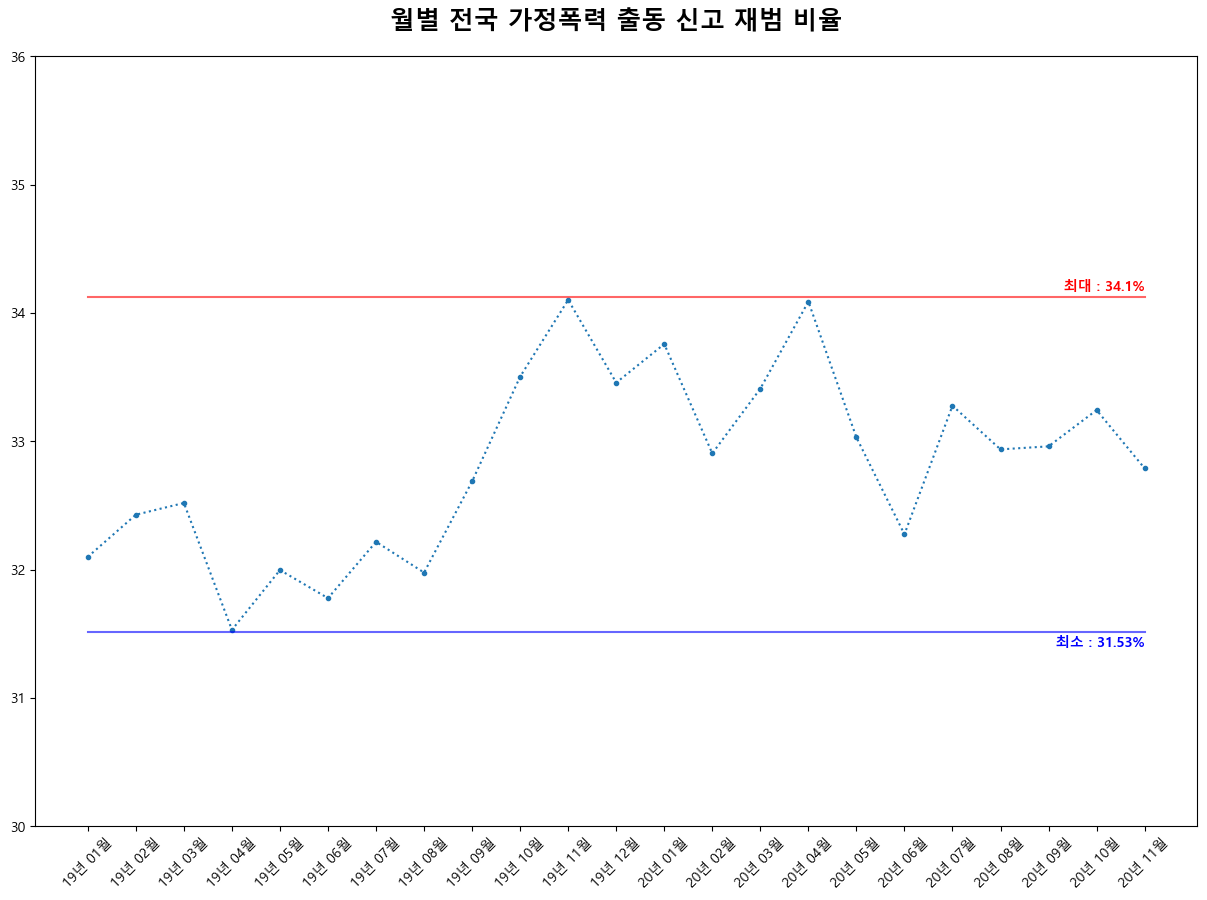

In [10]:
#value_setting
X=relapse.index[0:23]

plt.subplots(figsize=(15,10))

title_font = {
    'fontsize': 18,
    'fontweight': 'bold',
}

under_font = {
    'fontsize': 10,
    'fontweight': 'bold',
    'color':'blue'
}

upper_font = {
    'fontsize': 10,
    'fontweight': 'bold',
    'color':'red'
}

# plot
plt.plot(X,relapse.iloc[:23,1]/relapse.iloc[:23,0]*100,
        linestyle='dotted', # 선 스타일
        linewidth=1.5, # 선 두께 
        marker='.',
        )
plt.ylim(30,36)

plt.plot(X,np.repeat((relapse.iloc[:23,1]/relapse.iloc[:23,0]*100).min()-0.02,23),color='blue',alpha=0.6)
plt.plot(X,np.repeat((relapse.iloc[:23,1]/relapse.iloc[:23,0]*100).max()+0.02,23),color='red',alpha=0.6)

plt.text(X[-1],(relapse.iloc[:23,1]/relapse.iloc[:23,0]*100).min()-0.05,
         '최소 : '+str(np.round((relapse.iloc[:23,1]/relapse.iloc[:23,0]*100).min(),2))+'%',
         va='top' , ha='right' ,
         fontdict=under_font
        )
plt.text(X[-1],(relapse.iloc[:23,1]/relapse.iloc[:23,0]*100).max()+0.05,
         '최대 : '+str(np.round((relapse.iloc[:23,1]/relapse.iloc[:23,0]*100).max(),2))+'%',
         va='bottom' , ha='right' ,
         fontdict=upper_font
        )


plt.title('월별 전국 가정폭력 출동 신고 재범 비율', fontdict=title_font, pad=20)
plt.xticks(rotation=45)

# plt.savefig('월별 전국 가정폭력 출동 신고 재범 비율.png')
plt.show()

위 두 그래프에서 시사하듯, 가정폭력이 재발되어 접수되는 신고는 전국 총 가정폭력 신고접수건수에서 30% 이상을 차지한다.<br>
해당 사실에서 알 수 있는 사실은 **가정폭력은 재범률이 높은 특성을 가지고, 지속적으로 피해자를 고통스럽게 하는 범죄 유형이라는 것이다.**

### 2.2 가정폭력 검거 및 조치 현황 데이터 분석
그렇다면, 가정폭력 피해자들의 신고를 통해 검거된 인원과 처벌 유형을 분석해보자.<br>
가정폭력 처벌 및 조치 현황을 이해하기 위해 [가정폭력 검거 및 조치 현황](https://www.data.go.kr/data/15037060/fileData.do?recommendDataYn=Y#/layer_data_infomation)데이터를 분석해보겠다.

In [11]:
arrest_data= pd.read_csv('./dataset/경찰청_가정폭력 검거 및 조치 현황_20211231.csv')

In [12]:
arrest_data

,연도,검거건수,검거총인원,구속인원,불구속인원,가정보호사건 송치
0,2017,38583,45264,384,44880,15979
1,2018,41905,43576,355,43221,14689
2,2019,50277,59472,490,58982,21228
3,2020,44459,52431,330,52101,19379
4,2021,46041,53985,410,53575,24867


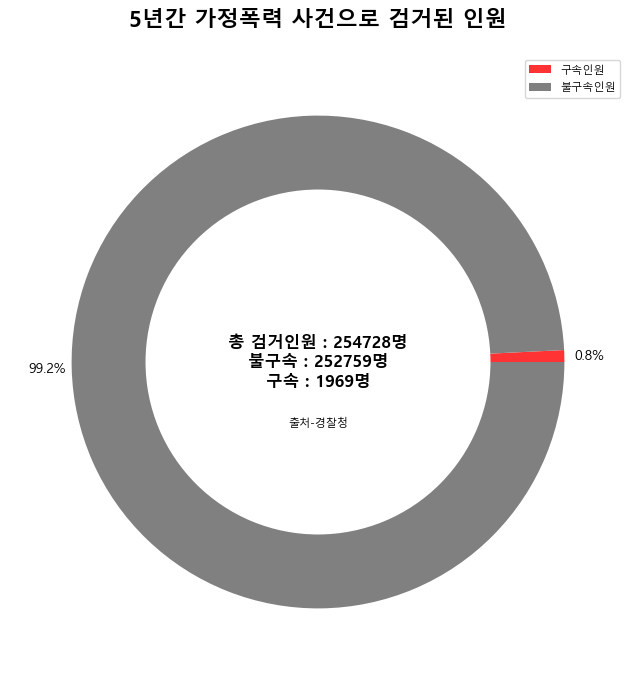

In [13]:
#value_setting
labels='구속인원','불구속인원'
values=[arrest_data['구속인원'].sum(),arrest_data['불구속인원'].sum()]
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
sub_font = {
    'fontsize': 12,
    'fontweight': 'bold'
}

#plot
plt.figure(figsize=(8,8))
plt.pie(values,
        radius=1,
        autopct='%0.1f%%',
        textprops={'fontsize':10},
        colors=['#FF3333','#808080'],
        pctdistance=1.1,
       )
plt.pie([1],
        radius=0.7,
        colors=['#FFFFFF'],
       )

plt.legend(labels,fontsize=8)

plt.text(0,0,
         '총 검거인원 : '+str(sum(arrest_data['검거총인원']))+'명\n'+
         '불구속 : '+str(sum(arrest_data['불구속인원']))+'명\n'+
         '구속 : '+str(sum(arrest_data['구속인원']))+'명',
         va='center' , ha='center' ,
         fontdict=sub_font
        )
plt.text(0,-0.25,
         '출처-경찰청',
         va='center' , ha='center' ,
         fontdict={'fontsize':8}
        )


plt.title('5년간 가정폭력 사건으로 검거된 인원', fontdict=title_font, pad=20)
# plt.savefig('5년간 가정폭력 사건으로 검거된 인원 pie.png')
plt.show()

검거인원 중 상당수가 불구속 처리가 된 사실을 통해,
대다수의 가정폭력 가해자가 입건 이후 일상생활에 지장없는 생활을 이어나가고 있음을 알 수 있다. <br><br>
가정폭력의 경우 가족구성원의 평화와 가해자 교화를 목적을 둔 가정보호사건으로 분류될 수 있다.<br>
가정보호사건은 피해자가 가해자의 형사 처벌을 원치 않을 경우 송치되며, 가해자는 형사처벌이 아닌 보호처분을 받고 전과에 남지 않게된다.<br>
전체 검거인원 중 가정보호사건으로 송치된 인원의 비율을 시계열로 알아보자.

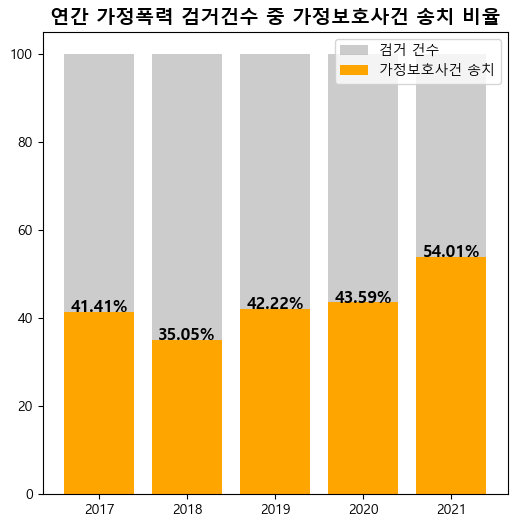

In [14]:
X=['2017','2018','2019','2020','2021']
tot=[100,100,100,100,100]
target=arrest_data['가정보호사건 송치']/arrest_data['검거건수']*100
# print(target)
title_font = {
    'fontsize': 14,
    'fontweight': 'bold'
}

sub_font = {
    'fontsize': 12,
    'fontweight': 'bold'
}

fig, ax = plt.subplots(figsize=(6,6))

index = np.arange(10)
bar_width = 0.25

plt.bar([1,2,3,4,5], tot, color='grey', alpha=0.4, label='검거 건수')

plt.bar([1,2,3,4,5], target, color='orange',  label='가정보호사건 송치')

plt.text(1,target[0],
         str(np.round(target[0],2))+'%',
         va='baseline' , ha='center' ,
         fontdict=sub_font
        )

plt.text(2,target[1],
         str(np.round(target[1],2))+'%',
         va='baseline' , ha='center' ,
         fontdict=sub_font
        )

plt.text(3,target[2],
         str(np.round(target[2],2))+'%',
         va='baseline' , ha='center' ,
         fontdict=sub_font
        )
plt.text(4,target[3],
         str(np.round(target[3],2))+'%',
         va='baseline' , ha='center' ,
         fontdict=sub_font
        )
plt.text(5,target[4],
         str(np.round(target[4],2))+'%',
         va='baseline' , ha='center' ,
         fontdict=sub_font
        )


plt.xticks([1,2,3,4,5], X)

# plt.xticks(np.arange(0, 10 , 1), X)

plt.title('연간 가정폭력 검거건수 중 가정보호사건 송치 비율',fontdict=title_font)
plt.savefig('연간 가정폭력 검거건수 중 가정보호사건 송치 비율 stacked.png')
plt.legend()
plt.show()

[국가통계포털](https://kosis.kr)에 의하면 가정폭력 피해자는 가족구성원이라는 이유와 그 순간만 모면하면 된다는 생각으로 폭력을 당하고도 이에 대응하지 않았고, 신고하기 이전부터 해당 사실을 주위에 알리는것을 창피해하기에, 주위에 도움을 요청하는 것에 소극적이라고 한다.<br>
이러한 사실과 상단 그래프를 통하여 가정폭력 검거건수 중 가정보호사건으로 송치된 경우는 적지 않고, 그 비율이 증가하고 있음을 알 수 있다.<br>

지금까지의 사실을 종합해서 얻어낸 인사이트는 다음과 같다.
### 가정폭력은 재범률이 높지만 처벌 강도는 낮아, 피해자들이 지속적으로 고통을 받고있다.
***

### 3.1 가정 폭력을 감소시키기 위해 필요한 정책 조사 데이터 분석
전체 신고 중, 가정폭력에 신고비율이 증가하는 현상은 가정 폭력이 사회적 문제로 점차 대두되고 있다는 뜻이기도 하다.<br>
그렇다면, 시민들이 생각하는 가정폭력을 감소시키기 위해 필요한 정책은 어떤 것이 있을지 [가정 폭력을 감소시키기 위해 필요한 정책](https://kosis.kr/statHtml/statHtml.do?orgId=154&tblId=DT_MOGE_1001000495&conn_path=I2)을 통하여 알아보자.

In [15]:
policy_survey=pd.read_csv('./dataset/가정폭력을_감소시키기_위해_필요한_정책_20230314162546.csv')

In [16]:
policy_survey

,정책별(1),전체,여성,남성
0,폭력 허용적 사회문화의 개선,24.9,24.2,25.7
1,가정폭력 관련 법 및 지원서비스 홍보,15.5,14.8,16.2
2,접근이 쉬운 곳에서 가정폭력 예방교육 실시,9.5,9.3,9.7
3,양성평등 의식교육,7.5,7.1,7.9
4,학교에서 아동기부터 폭력 예방교육 실시,12.2,12.0,12.4
5,가정폭력피해자에 대한 지원 제공,4.6,5.1,4.0
6,경찰의 신속한 수사,9.2,9.9,8.4
7,가중 처벌 등 가해자에 대한 법적 조치 강화,13.6,14.7,12.5
8,"상담, 교육 등 가해자의 교정치료프로그램 제공",2.8,2.6,3.0
9,기타,0.1,0.2,0.1


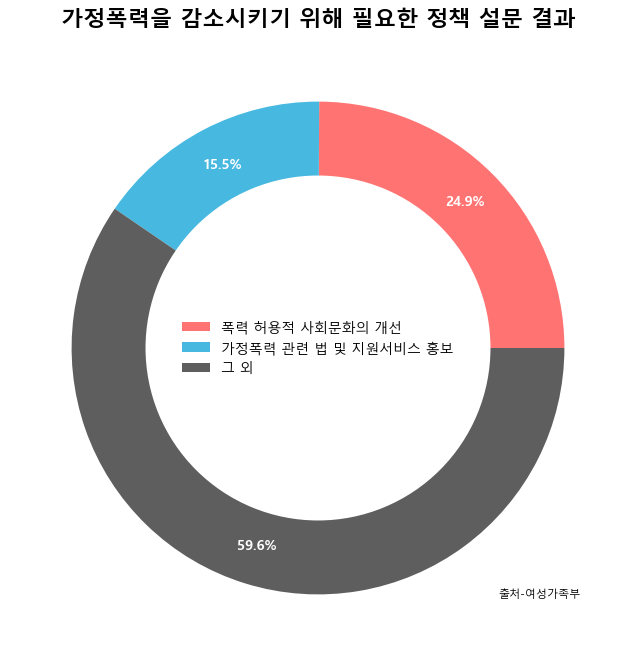

In [17]:
#value_setting
labels=['폭력 허용적 사회문화의 개선','가정폭력 관련 법 및 지원서비스 홍보','그 외']
values=sorted(policy_survey['전체'].values,reverse=True)[:2]+[sum(sorted(policy_survey['전체'].values,reverse=True)[2:])]
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}

#plot
fig=plt.figure(figsize=(8,8))
plt.pie(values,
        radius=1,
        autopct='%0.1f%%',
        textprops={'fontsize':10, 'color':'w','fontweight': 'bold'},
        colors=['#ff7473','#47b8e0','#5e5e5f'],
        pctdistance=0.84,
       )
plt.pie([1],
        radius=0.7,
        colors=['#FFFFFF'],
       )

plt.legend(labels,fontsize=10,loc='center',frameon=False)

plt.text(0.9,-1,
         '출처-여성가족부',
         va='center' , ha='center' ,
         fontdict={'fontsize':8}
        )


plt.title('가정폭력을 감소시키기 위해 필요한 정책 설문 결과', fontdict=title_font, pad=10)
# plt.savefig('가정폭력을 감소시키기 위해 필요한 정책 설문 결과.png')
plt.show()

위 그래프에서 알 수 있듯, 상위 2개 응답은 **'폭력 허용적 사회문화의 개선','가정폭력 관련 법 및 지원서비스 홍보'** 임을 알 수있다.<br>
폭력 허용적 사회문화를 개선하기 위해서는 [블랙닷 캠페인](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=bloglh&logNo=220855651696), [폭력 사인 캠페인](https://v.daum.net/v/20200623074803628) 등 여러 가정폭력과 관련된 공익 캠페인을 시민들이 숙지하고, 가정폭력 상황을 인지하고 신고하는 등 사회적으로 성숙해질 필요가 있다.<br>


### 3.2 가정폭력 지원기관 인지 여부 데이터 분석
[현행중인 가정폭력 지원기관](http://www.mogef.go.kr/sp/hrp/sp_hrp_f004.do)을 살펴보면 지원서비스는 다양한 방면으로 마련되어있다.<br>
허나 앞서 언급했듯, 가정폭력 관련 법 및 지원서비스 홍보가 제대로 이루어지고 있는지 확인할 필요가 있다.<br>
[가정 폭력 지원 기관 인지 여부](https://kosis.kr/statHtml/statHtml.do?orgId=154&tblId=DT_154011_091&conn_path=I2)데이터를 통하여 가정폭력 지원기관에 대한 사회적 인지도를 분석해보자.

In [18]:
service_survey=pd.read_csv('./dataset/가정폭력_관련_지원기관_인지_여부_20230314154317.csv').iloc[:,1:]

In [19]:
service_survey

,지원기관별(1),2019,2019.1,2019.2
0,지원기관별(1),분석 대상수 (명),안다 (%),모른다 (%)
1,가정폭력 상담소,9059,74.9,25.1
2,"가정폭력 피해자 보호시설(쉼터), 공동생활가정(그룹홈)",9058,58.2,41.8
3,1366,9058,43.3,56.7
4,"가정폭력, 아동 및 노인학대 긴급신고 112(24시간 운영)",9050,65.1,34.9
5,아동보호전문기관,9059,59.7,40.3
6,노인보호전문기관,9055,48.6,51.4


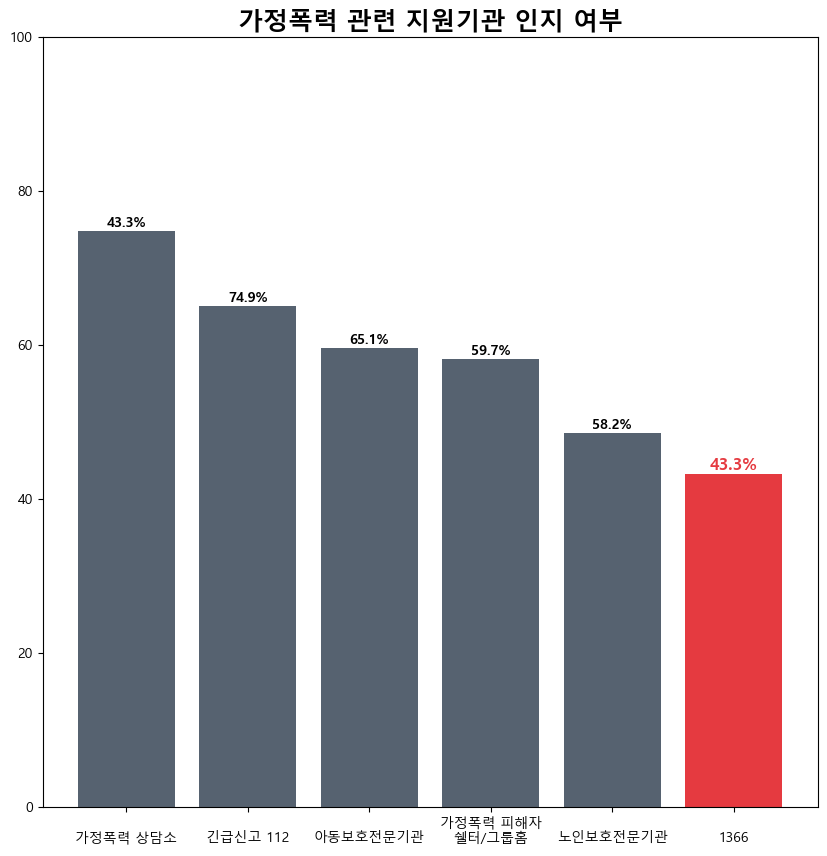

In [20]:
#value_setting
X=list(range(1,6))
target=sorted(list(service_survey['2019.1'][1:].astype(float)),reverse=True)

title_font = {
    'fontsize': 18,
    'fontweight': 'bold',
}
txt_font = {
    'fontsize': 10,
    'fontweight': 'bold',
}
target_font={
    'fontsize': 12,
    'fontweight': 'bold',
    'color':'#E53A40'
}

#plot
plt.subplots(figsize=(10,10))

plt.bar([6],float(service_survey.iloc[3,2]),
        color='#E53A40',
        alpha=1
       )


plt.bar(X,target[:-1],
        color='#566270',
        alpha=1
       )


for i in range(5):
    plt.text(i+1,target[i]+0.5,
             str(target[i-1])+'%',
             va='baseline' , ha='center' ,
             fontdict=txt_font
            )
    
    
plt.text(6,target[-1]+0.5,
         str(target[-1])+'%',
         va='baseline' , ha='center' ,
         fontdict=target_font
        )

plt.title('가정폭력 관련 지원기관 인지 여부', fontdict=title_font)

plt.ylim(0,100)

plt.xticks(list(range(1,7)),['\n가정폭력 상담소','\n긴급신고 112','\n아동보호전문기관','가정폭력 피해자\n쉘터/그룹홈','\n노인보호전문기관','\n1366'])

# plt.savefig('가정폭력 관련 지원기관 인지 여부.png')

plt.show()

위 결과를 분석해보면, 여성긴급전화 1366에 대한 인지율이 다른 기관에 비해 저조한 편이다.<br>
현행중인 지원 서비스 중 인터넷 매체를 이용한 지원 서비스의 인지도를 높여야할 필요가 있어보인다.

지금까지의 사실을 종합해서 얻어낸 인사이트는 다음과 같다.

### 가정폭력을 줄이기 위해서 현행 지원기관, 관련 공익 캠페인들을 홍보하여 시민들의 경각심을 일깨워야 한다.
***

## 결론

해당 분석을 통해 도출한 인사이트들을 접목하여 이번 데이터 분석 프로젝트에서는<br>
가정폭력 피해자들이 타인의 시선에 신경쓰지 않고 고민을 상담할 수 있는 **익명 상담/게시판 커뮤니티 기능**,<br>
또한 시민들의 사회적 인식을 개선하기 위해 **다양한 정부 지원 기관에 대한 안내와 정책 및 공익 캠페인을 홍보하는 기능**을 갖춘 웹서비스를 개설하겠다.